<a href="https://colab.research.google.com/github/jayrom/fiap_agro_machine/blob/main/Cloud_Computing_FarmTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print(df.head())

Saving crop_yield.csv to crop_yield (1).csv
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4               

Visualização inicial dos dados:
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.

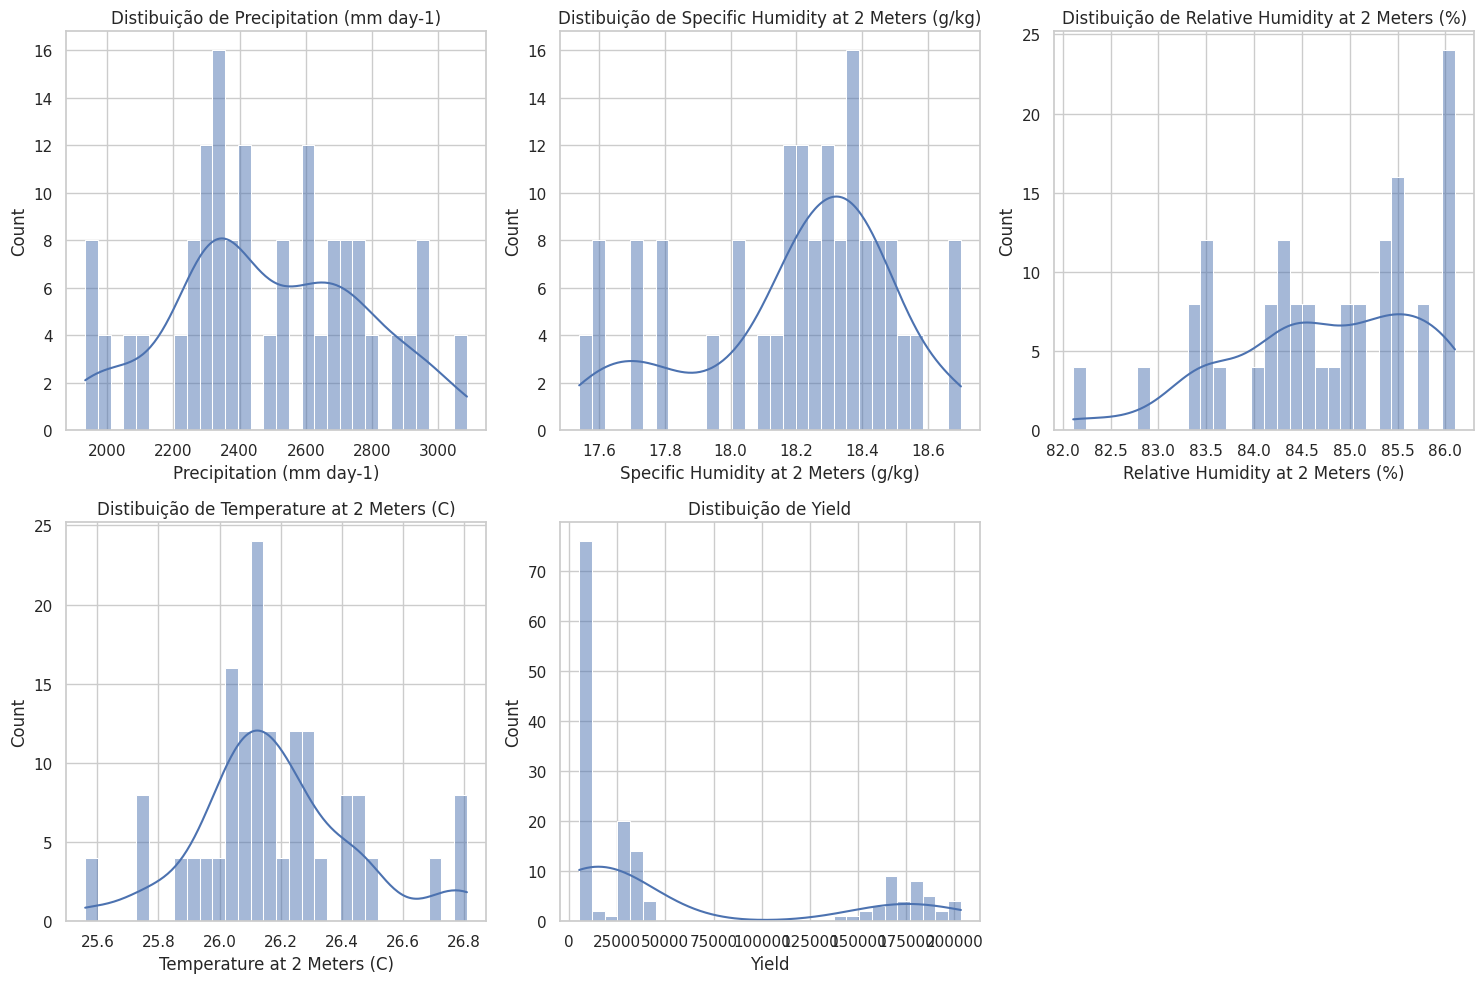

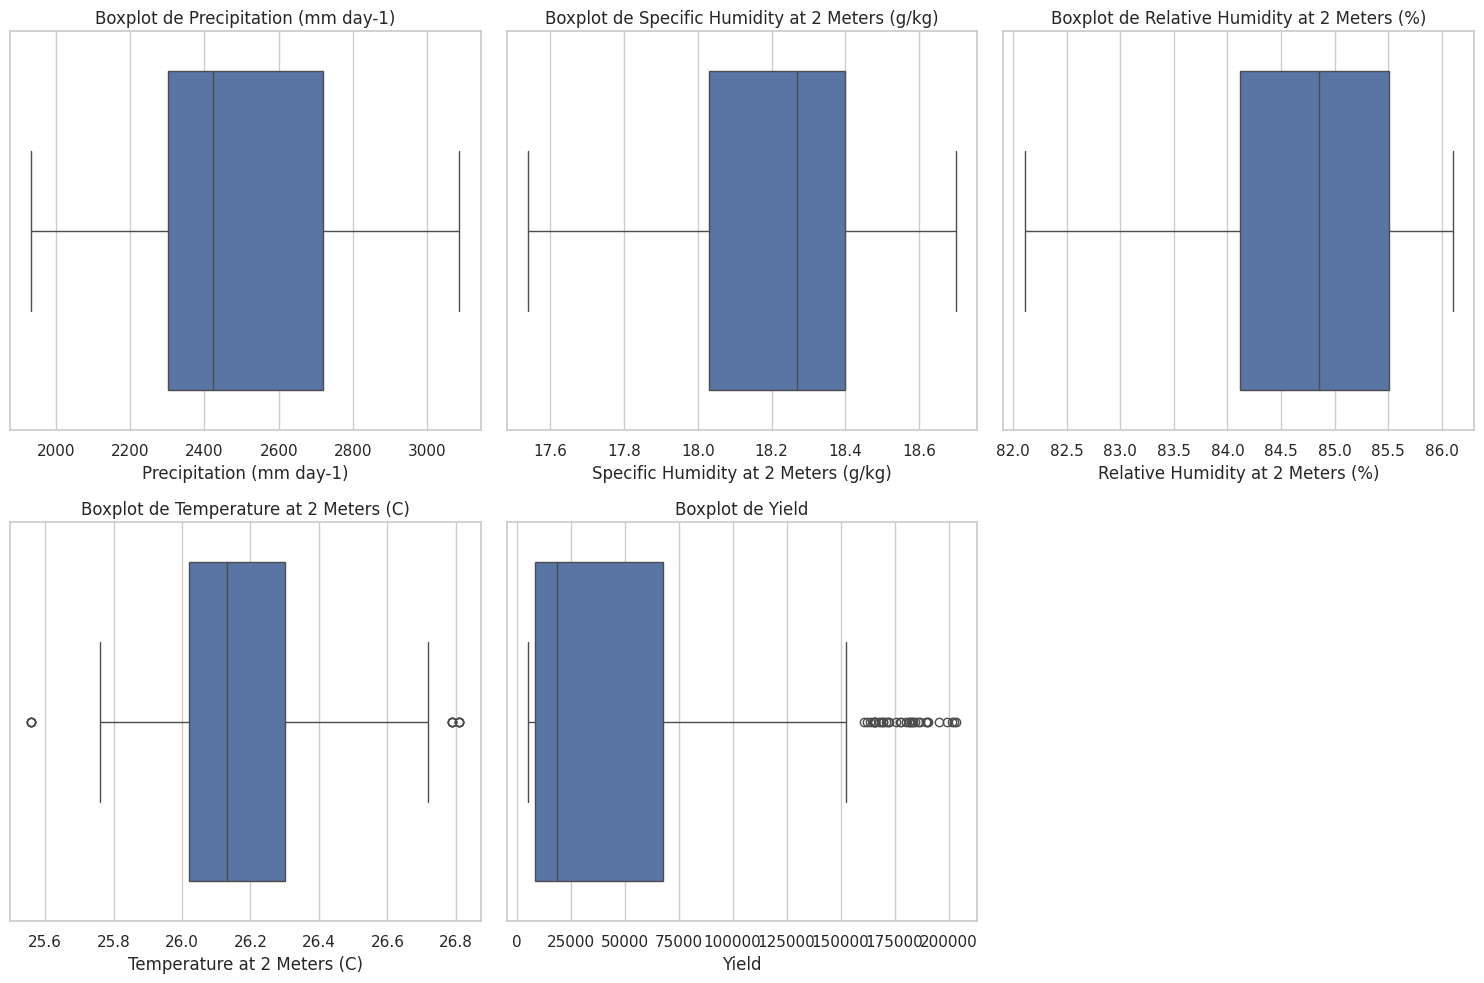

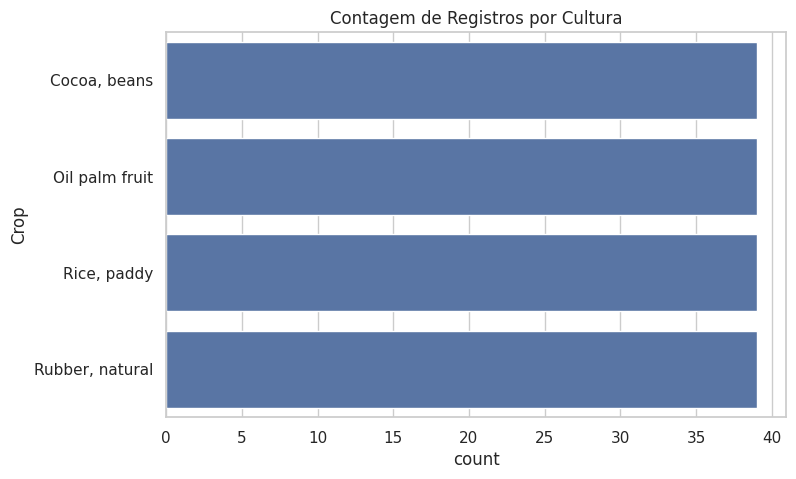


Exemplo: Primeiros dados das variáveis numéricas após normalização:
[[-0.82341547 -1.64884495 -1.34708396 -0.66710937]
 [-1.89956502 -2.26322349 -2.64614077 -0.28280708]
 [-0.64104192 -1.34165569 -1.96136664  0.21678591]
 [ 0.36686484 -2.0242985   0.33464075 -2.39646972]
 [-0.49138608 -2.0242985  -0.62202899 -1.62786512]]


In [ ]:
!pip install -q scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ajuste estérico de gráfico
sns.set(style="whitegrid")

file_name = 'crop_yield.csv'

df = pd.read_csv(file_name)

print("Visualização inicial dos dados:")
print(df.head())

# Informações gerais (tipo, não nulos, memória)
print("\nInformações gerais dos dados:")
print(df.info())

# Estatística descritivas quantitativas
print("\nEstatísticas descritivas quantitativas:")
print(df.describe())

# Análise de valores faltantes
print("\nValores faltantes por coluna")
print(df.isnull().sum())

# Visualização Simples da distribuição das variáveis numéricas
num_cols = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
            'Yield']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distibuição de {col}')
plt.tight_layout()
plt.show()

# Boxplot para detectar outliers por variável numérica
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Contagem de registros por cultivo
plt.figure(figsize=(8, 5))
sns.countplot(y='Crop', data=df, order=df['Crop'].value_counts().index)
plt.title('Contagem de Registros por Cultura')
plt.show()

# Preparando dados para modelagem
features = df[num_cols[:-1]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("\nExemplo: Primeiros dados das variáveis numéricas após normalização:")
print(features_scaled[:5])

## Análise Primária dos Dados

Neste trecho, temos uma análise primária que apresenta algumas informações pertinentes à próxima etapa de análise que iremos executar.

A análise apresentou os seguintes resultados:

### 1. Visualização inicial dos dados (df.head()):
- Mostra as primeiras 5 linhas do conjunto de dados, indicando o formato e conteúdo das colunas.
Exemplo: A Cultura (Crop) é "Cocoa, Beans", com suas respectivas medições climáticas e o rendimento (Yield) correspondente.

### 2. Informações Gerais dos dados (df.infor()):
Apresenta um resumo do DataFrame:
- Quantidade total de registros (156 linhas);

- Os nomes das colunas e seus tipos de dados (ex.: "float64" para números decimais, "int64" para inteiros e "object" para textos);

- Números não nulos em cada coluna (nesse caso, não há valor faltante em nenhuma coluna);

- Memória usada pelo DataFrame.

### 3. Estatísticas descritivas quantitativas (df.describe()):
Apresenta medidas estatísticas para as colunas numéricas:

- *count*: número de valores em cada coluna (sempre 156);
- *mean*: média de valores de cada coluna;
- *std*: desvio padrão, indicando a dispersão dos dados em relação à média;
- *min/max*: os menores e maiores valores;
- *25%, 50%, 75%*: Os quartis, que dividem os dados em quatro partes iguais; 50% é a mediana;

Exemplo: a média de Precipitação é 2486.5 mm/dia, com valor mínimo de 1934.6 e máximo de 3085.79


### 4. Valores faltantes por coluna (df.isnull().sum()):
Mostra a quantidade de valores faltantes (NaN) há em cada coluna.
Aqui, todas estão com zero, ou seja, indica que o conjunto de dados está completo, sem dados ausentes.



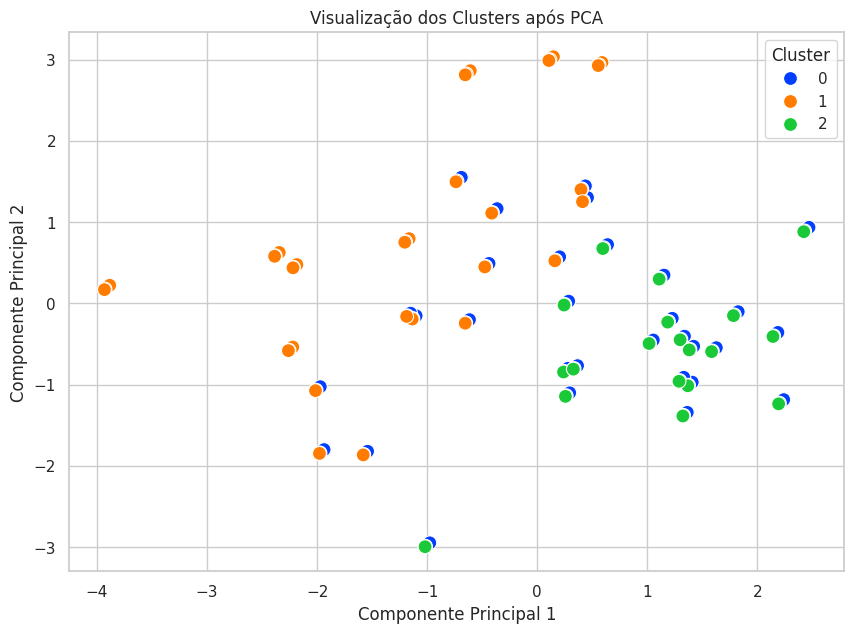

Foram identificados 45 outliers nas variáveis analisadas.

Exemplos de dados considerados outliers:
                Crop  Precipitation (mm day-1)  \
3       Cocoa, beans                   2592.35   
134  Rubber, natural                   2362.80   
17      Cocoa, beans                   2362.80   
152  Rubber, natural                   2410.13   
35      Cocoa, beans                   2410.13   
39    Oil palm fruit                   2248.92   
40    Oil palm fruit                   1938.42   
42    Oil palm fruit                   2592.35   
43    Oil palm fruit                   2344.72   
44    Oil palm fruit                   2339.30   
45    Oil palm fruit                   2326.09   
46    Oil palm fruit                   2718.08   
47    Oil palm fruit                   2061.61   
48    Oil palm fruit                   1934.62   
51    Oil palm fruit                   2530.96   
52    Oil palm fruit                   2504.70   
53    Oil palm fruit                   2686.20   


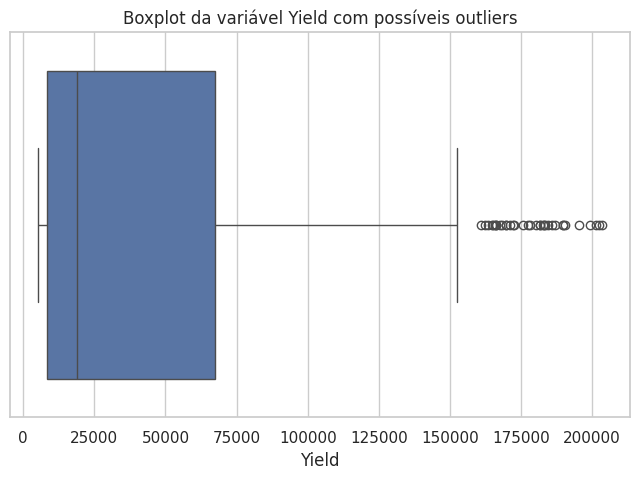

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

num_cols = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
            'Yield']

data_num = df[num_cols]

# Normalizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Aplicando K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adicionar o cluster ao DataFrame original
df['Cluster'] = clusters

# Redução de dimensionalidade para visualização (PCA 2 componentes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
palette = sns.color_palette("bright", k)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters,
                palette=palette, s=100)
plt.title('Visualização dos Clusters após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

# Detecção de Outliers pelo método IQR (para cada variável numérica)
outliers_indices = set()
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
  outliers_indices.update(outliers_col)


print(f"Foram identificados {len(outliers_indices)} outliers nas variáveis analisadas.")

#Mostrar linhas identificadas como Outliers

outliers_df = df.loc[list(outliers_indices)]
print("\nExemplos de dados considerados outliers:")
print(outliers_df)

# Visualização de Outliers na distribuição do Yield
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Yield'])
plt.title('Boxplot da variável Yield com possíveis outliers')
plt.show()

## Gráfico de Visualização do cluster após PCA

- O gráfico é uma representação visual dos dados agrícolas agrupados em 3 clusters diferentes pelo algoritmo K-means (os números 0, 1 e 2 na legenda).
Como os dados originais têm várias variáveis numéricas (precipitação, umidade, temperatura, rendimento, etc.), foi usada a técnica PCA (Análise de Componentes Principais) para reduzir essas várias dimensões para 2 componentes principais (eixos X e Y no gráfico), para que possamos visualizar os dados em 2D.
Cada ponto no gráfico representa um registro (uma linha do seu dataset).
A cor dos pontos indica a qual cluster aquele registro pertence, baseado em similaridade dos dados normalizados.

- Os eixos são as duas componentes principais geradas pelo PCA.
Eles são combinações lineares das variáveis originais que capturam a maior parte da variabilidade dos dados na forma de 2 dimensões.
Os valores em torno de zero indicam que aqueles pontos estão perto da média dos dados na direção do componente, enquanto valores maiores ou menores indicam desvios para diferentes características do conjunto.


## Interpretação dos Clusters

- Cada cluster representa um grupo de condições climáticas e rendimento que são semelhantes entre si.
Por exemplo, o cluster 0 (azul) pode agrupar registros com características climáticas e produção similares, diferente do cluster 1 (laranja) e do cluster 2 (verde).
Essa segmentação pode ajudar a entender diferentes padrões em suas plantações, como quais condições estão associadas a maiores ou menores rendimentos.

## Relação com os outliers

- Os 45 outliers identificados pelo método IQR são pontos com valores atípicos em pelo menos uma das variáveis (precipitação, umidade, temperatura ou rendimento).
Nos dados impressos, temos as linhas que foram consideradas outliers (exemplo: algumas plantações de “Oil palm fruit”, “Cocoa, beans”, e “Rubber, natural”).
Outliers podem influenciar a clusterização, por isso é importante reconhecê-los, pois podem indicar casos extremos, erros de medição ou situações especiais.

### Random Forest

Safras Disponíveis: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

--- Cultura Selecionada: Rice, paddy ---
MAE (Erro Médio Absoluto): 3865.56
R² (Coeficiente de Determinação): 0.01

Comparação dos Rendimentos Reais e Previstos
   Yield Real  Yield Previsto
0       29855        35180.92
1       37496        34443.82
2       26648        26612.46
3       30614        30061.99
4       37468        28745.60
5       35277        31103.42
6       24686        29209.60
7       35836        31296.74


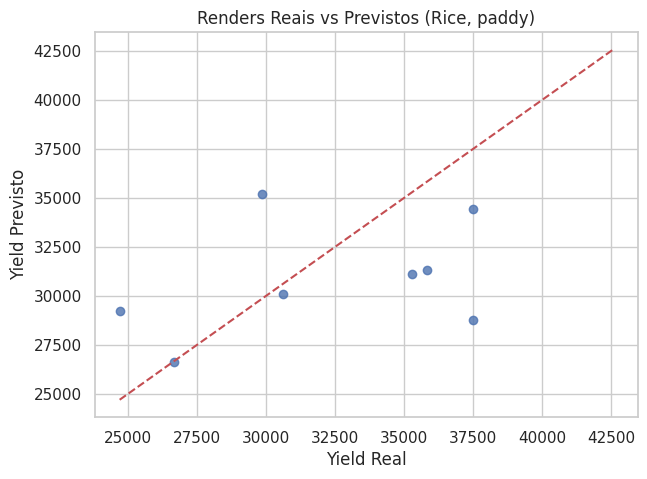

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

def prever_yield_por_crop(df, crop_name):
  print(f"\n--- Cultura Selecionada: {crop_name} ---")

  dados_crop = df[df['Crop'] == crop_name].copy()

  X = dados_crop[['Precipitation (mm day-1)',
                  'Specific Humidity at 2 Meters (g/kg)',
                  'Relative Humidity at 2 Meters (%)',
                  'Temperature at 2 Meters (C)']]

  y = dados_crop['Yield']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
  print(f"R² (Coeficiente de Determinação): {r2:.2f}")

  comparacao = pd.DataFrame({'Yield Real': y_test, 'Yield Previsto': y_pred})
  print("\nComparação dos Rendimentos Reais e Previstos")
  print(comparacao.reset_index(drop=True))

  plt.figure(figsize=(7, 5))
  plt.scatter(y_test, y_pred, alpha=0.8)
  plt.xlabel('Yield Real')
  plt.ylabel('Yield Previsto')
  plt.title(f'Renders Reais vs Previstos ({crop_name})')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
  plt.show()

  return model

print("Safras Disponíveis:", df['Crop'].unique())

safra_escolhida = "Rice, paddy" # ajsute conforme safra desejada

modelo = prever_yield_por_crop(df, safra_escolhida)

## Regressão Linear

Safras disponíveis: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

--- Cultura Selecionada: Rice, paddy
MAE (Erro Médio Absoluto): 2962.52
R² (Coeficiente de Determinação): 0.39

Comparação dos Rendimentos Reais e Previstos
   Yield Real  Yield Previsto
0       29855    35326.926358
1       37496    37946.747637
2       26648    25489.931659
3       30614    30693.467139
4       37468    32068.625921
5       35277    32652.317821
6       24686    30006.846508
7       35836    32640.966240


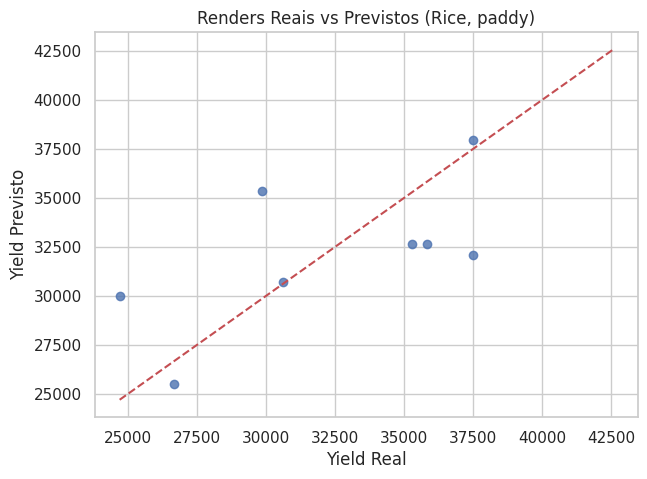

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

def prever_yield_linear_por_crop(df, crop_name):
  print(f"\n--- Cultura Selecionada: {crop_name}")

  dados_crop = df[df['Crop'] == crop_name].copy()

  X = dados_crop[['Precipitation (mm day-1)',
                  'Specific Humidity at 2 Meters (g/kg)',
                  'Relative Humidity at 2 Meters (%)',
                  'Temperature at 2 Meters (C)']]

  y = dados_crop['Yield']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
  print(f"R² (Coeficiente de Determinação): {r2:.2f}")

  comparacao = pd.DataFrame({'Yield Real': y_test, 'Yield Previsto': y_pred})
  print("\nComparação dos Rendimentos Reais e Previstos")
  print(comparacao.reset_index(drop=True))

  plt.figure(figsize=(7, 5))
  plt.scatter(y_test, y_pred, alpha=0.8)
  plt.xlabel('Yield Real')
  plt.ylabel('Yield Previsto')
  plt.title(f'Renders Reais vs Previstos ({crop_name})')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
  plt.show()

  return model

print("Safras disponíveis:", df['Crop'].unique())
safra_escolhida = "Rice, paddy" # Ajuste de acordo com a colheita desejada

modelo_linear = prever_yield_linear_por_crop(df, safra_escolhida)

## Gradiente Boosting Machine (GBM)

Safras disponíveis: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

--- Cultura Selecionada: Rice, paddy
MAE (Erro Médio Absoluto): 4231.55
R² (Coeficiente de Determinação): -0.27
   Yield Real  Yield Previsto
0       29855    39671.199219
1       37496    39031.660156
2       26648    26421.214844
3       30614    31990.976562
4       37468    29556.134766
5       35277    31705.605469
6       24686    28811.044922
7       35836    30547.552734


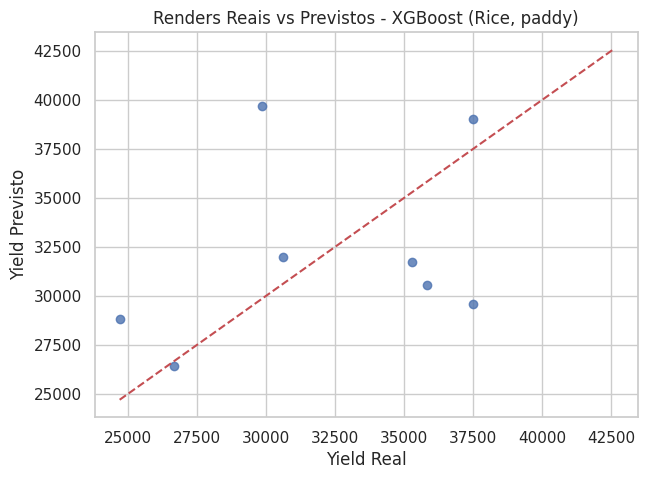

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

def prever_yield_xgboost_por_crop(df, crop_name):
  print(f"\n--- Cultura Selecionada: {crop_name}")

  dados_crop = df[df['Crop'] == crop_name].copy()

  X = dados_crop[['Precipitation (mm day-1)',
                  'Specific Humidity at 2 Meters (g/kg)',
                  'Relative Humidity at 2 Meters (%)',
                  'Temperature at 2 Meters (C)']]

  y = dados_crop['Yield']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
  print(f"R² (Coeficiente de Determinação): {r2:.2f}")

  comparacao = pd.DataFrame({'Yield Real': y_test, 'Yield Previsto': y_pred})
  print(comparacao.reset_index(drop=True))

  plt.figure(figsize=(7, 5))
  plt.scatter(y_test, y_pred, alpha=0.8)
  plt.xlabel('Yield Real')
  plt.ylabel('Yield Previsto')
  plt.title(f'Renders Reais vs Previstos - XGBoost ({crop_name})')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
  plt.show

  return model

print("Safras disponíveis:", df['Crop'].unique())
safra_escolhida = "Rice, paddy" # Ajustar de acordo com a safra desejada

modelo_xgboost = prever_yield_xgboost_por_crop(df, safra_escolhida)

## CatBoost

In [ ]:
!pip install catboost

Safras Disponíveis: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

--- Cultura Selecionada: Rice, paddy
MAE (Erro Médio Absoluto): 3842.51
R² (Coeficiente de Determinação): 0.06

Comparação dos Renders Reais e Previstos:
   Yield Real  Yield Previsto
0       29855    36019.959499
1       37496    33895.156619
2       26648    27060.272135
3       30614    30459.325108
4       37468    30018.888818
5       35277    31172.252839
6       24686    29486.982889
7       35836    31783.540815


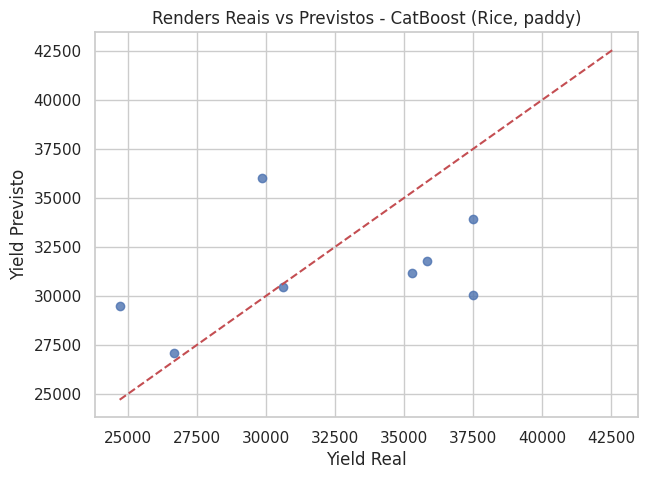

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

def prever_yield_catboost_por_crop(df, crop_name):
  print(f"\n--- Cultura Selecionada: {crop_name}")

  dados_crop = df[df['Crop'] == crop_name].copy()

  X = dados_crop[['Precipitation (mm day-1)',
                  'Specific Humidity at 2 Meters (g/kg)',
                  'Relative Humidity at 2 Meters (%)',
                  'Temperature at 2 Meters (C)']]

  y = dados_crop['Yield']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
  print(f"R² (Coeficiente de Determinação): {r2:.2f}")

  comparacao = pd.DataFrame({'Yield Real': y_test, 'Yield Previsto': y_pred})
  print("\nComparação dos Renders Reais e Previstos:")
  print(comparacao.reset_index(drop=True))

  plt.figure(figsize=(7, 5))
  plt.scatter(y_test, y_pred, alpha=0.8)
  plt.xlabel('Yield Real')
  plt.ylabel('Yield Previsto')
  plt.title(f'Renders Reais vs Previstos - CatBoost ({crop_name})')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
  plt.show()

  return model


print("Safras Disponíveis:", df['Crop'].unique())
safra_escolhida = "Rice, paddy" # Ajustar de acordo com a safra desejada

modelo_catboost = prever_yield_catboost_por_crop(df, safra_escolhida)

## Redes Neurais Artificiais (ANN)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


Safras Disponíveis: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

--- Cultura Selecionada: Rice, paddy
Colunas disponíveis para a cultura selecionada: ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield', 'Cluster']
Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9455 - mae: 0.8094 - val_loss: 1.3624 - val_mae: 0.8472
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.8985 - mae: 0.7877 - val_loss: 1.3292 - val_mae: 0.8370
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.8542 - mae: 0.7664 - val_loss: 1.2974 - val_mae: 0.8260
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.8124 - mae: 0.7454 - val_loss: 1.2677 - val_mae: 0.8185
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.7731 - mae: 0.7245 - val_loss: 1.2380 - val_mae: 0.8136
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.7361 - mae: 0.7039 - va

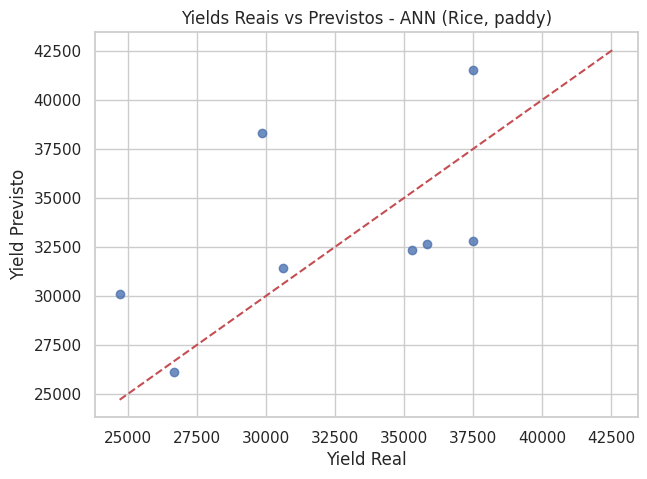

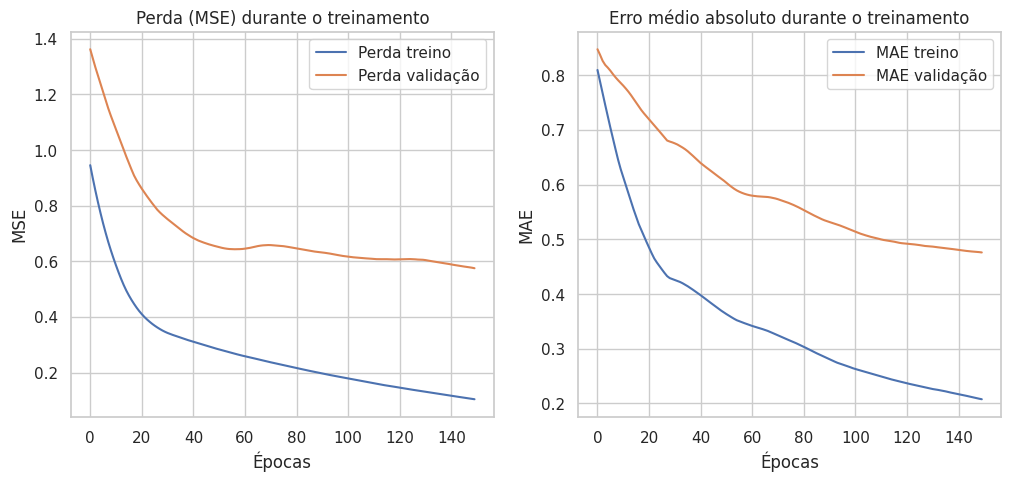

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

def prever_yield_ann_por_crop(df, crop_name):
    print(f"\n--- Cultura Selecionada: {crop_name}")

    dados_crop = df[df['Crop'] == crop_name].copy()

    print("Colunas disponíveis para a cultura selecionada:", dados_crop.columns.tolist())

    # Colunas preditoras atualizadas com os nomes corretos
    colunas_preditoras = ['Precipitation (mm day-1)',
                         'Specific Humidity at 2 Meters (g/kg)',
                         'Relative Humidity at 2 Meters (%)',
                         'Temperature at 2 Meters (C)']

    faltantes = [col for col in colunas_preditoras if col not in dados_crop.columns]
    if faltantes:
        raise KeyError(f"As colunas a seguir não foram encontradas no DataFrame filtrado: {faltantes}")

    X = dados_crop[colunas_preditoras]
    y = dados_crop['Yield']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar preditores
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Escalar variável alvo
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

    # Usar camada Input para evitar warnings
    from tensorflow.keras import Input
    model = tf.keras.models.Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    history = model.fit(X_train_scaled, y_train_scaled, epochs=150, batch_size=32,
                        validation_split=0.2, verbose=1)

    y_pred_scaled = model.predict(X_test_scaled).flatten()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
    print(f"R² (Coeficiente de Determinação): {r2:.2f}")

    comparacao = pd.DataFrame({'Yield Real': y_test, 'Yield Previsto': y_pred})
    print("\nComparação dos Yields Reais e Previstos:")
    print(comparacao.reset_index(drop=True))

    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred, alpha=0.8)
    plt.xlabel('Yield Real')
    plt.ylabel('Yield Previsto')
    plt.title(f'Yields Reais vs Previstos - ANN ({crop_name})')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.show()

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Perda treino')
    plt.plot(history.history['val_loss'], label='Perda validação')
    plt.title('Perda (MSE) durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['mae'], label='MAE treino')
    plt.plot(history.history['val_mae'], label='MAE validação')
    plt.title('Erro médio absoluto durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

    return model, scaler_X, scaler_y

print("Safras Disponíveis:", df['Crop'].unique())
safra_escolhida = "Rice, paddy"  # Ajuste conforme necessário

modelo_ann, scaler_ann, scaler_y = prever_yield_ann_por_crop(df, safra_escolhida)


# Resumo Geral dos Resultados:

##Modelo:

###Random Forest:
- MAE: 3865.56
- R²: 0.01
Erro moderado e praticamente não explica a variância

###Regressão Linear:
- MAE: 2962.52
- R²: 0.39
Melhor explicação (R² positivo e razoável); bom MAE.

###GBM:
- MAE: 4231.55
- R²: -0.27
Alto erro; Modelo não explica variância (R² Negativo)

###CatBoost:
- MAE: 3842.51
- R²: 0.06
MAE parecido com Random Forest; pouca explicação (R² quase 0)

###Redes Neurais Artificiais (ANN):
- MAE: 3753.98
- R²: 0.09
Erro menor que RF e CatBoost; Leve aumento no R²

# Análise Detalhada

## Modelo com Resposta mais próxima ao ideal:

### Regressão Linear

- Melhor desempenho geral na métrica R², indicando que explica cerca de 39% da variância do rendimento;

- MAE mais baixo, significando *Erro Absoluto Médio* menor nas previsões;

- Apesar de ser um modelo simples, conseguiu captar relações lineares valiosas na variável alvo para essa cultura (Rice, paddy).


### REde Neural Artificial (ANN)

- MAE próximo ao de CatBoost e Random Forest, mas ligeiramente melhor;

- R² com leve melhora na explicação da variância;

- Tem potencial de melhorar desde que tenham mais ajustes (arquitetura, pré-processamento, dados);

- Benefício de modelar relações não lineares, apesar de pouco explorado.


## Modelos com Respostas Mais Distantes do Ideal

### Gradient Boosting Machine (GBM):

- Apresentou maior erro absoluto médio (4231.55);

- R² negativo, mostrando que o modelo está pior que uma média constante;

- Possivelmente impactado por características dos dados;


### Random Forest e CatBoost

- Apresentaram erros medianos próximos, respectivamente 3865 e 3842;

- R² praticamente nulo em ambos os casos, 0.01 e 0.06, o que indica uma baixa capacidade explicativa.



# Possíveis Melhorias para Todos os Modelos


## Exploração Mais Profunda de Variáveis Preditoras:

- Incluir variáveis adicionais que possam afetar a produtividade agrícola, por exemplo: Práticas Agrícolas, Fatores Climáticos Históricos, Características do Solo;

- Engenharia de features que ajudem a capturar relações temporais e interações.


## Pré-processamento e Limpeza de Dados

- Tratar outliers que possam afetar métricas;

- Balancear e Normalizar escalas.

## Ajustes de Hiperparâmetros

- Para modelos como Random Forest, CatBoost e GBM, uma busca cuidadosa por hiperparâmetros pode melhorar a análise e reduzir substancialmente o erro;

- Para um modelo ANN, pode-se testar diferentes arquiteturas, funções de ativação e técnica de regularização para melhorar seus resultados.

## Aumento na Quantidade e Qualidade dos Dados

- Quanto maior a quantidade e a qualidade dos dados para treino e teste, melhor os modelos preditivos tendem a melhorar. Principalmente modelos mais complexos, como por exemplo, o ANN.



# Conclusões


- Mesmo sendo mais simples, a Regressão Linear foi a que apresentou melhores resultados. Dentre todos os modelos, o foi o que apresentou os resultados mais próximos ao ideal mesmo sendo um modelo simples;

- Se dedicado maior tempo e trabalho nos ajustes finos, o modelo ANN apresenta maior potencial de evolução, podendo superar os modelos tradicionais.

- Já os modelos de Boosting (GBM e CatBoost), assim como Random Forest, apresentam uma desempenho mais distante do ideal, o que sugere maior necessidade de tratamento de dados e revisão de parâmetros, visando um melhor desempenho e aproveitamento.

